<a href="https://colab.research.google.com/github/sauravakolia/RockPaperScissor/blob/master/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

In [3]:
!git clone https://github.com/sauravakolia/RockPaperScissor.git

Cloning into 'RockPaperScissor'...
remote: Enumerating objects: 2006, done.
remote: Counting objects: 100% (2006/2006), done.
remote: Compressing objects: 100% (2006/2006), done.
remote: Total 5159 (delta 0), reused 2006 (delta 0), pack-reused 3153
Receiving objects: 100% (5159/5159), 441.87 MiB | 14.77 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [0]:
# import os
# import zipfile

# local_zip = 'rockpaperscissors.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('RockPaperScissor')
# zip_ref.close()


In [4]:
path = Path('RockPaperScissor')
path

PosixPath('RockPaperScissor')

In [0]:
# folder = 'none'
# file = 'none'

In [0]:
# # path = Path('data/bears')
# dest = path/folder
# dest.mkdir(parents=True, exist_ok=True)

In [0]:
# path.ls()

In [0]:
# download_images(path/folder/file, dest, max_pics=200)

In [0]:
# df=pd.read_csv(path/'train.csv')
# df.head()


In [0]:
np.random.seed(42)
src = (ImageList.from_folder(path)
       .split_by_rand_pct(0.2)
       .label_from_folder()
      )

In [0]:
# tfms = get_transforms(max_rotate=20, max_zoom=1.3, max_lighting=0.4, max_warp=0.4,
#                       p_affine=1., p_lighting=1.)

In [0]:
data = (src.transform(size=(400,400))
        .databunch().normalize(imagenet_stats))

# data=ImageDataBunch.from_folder(path, ds_tfms=tfms, size=24)


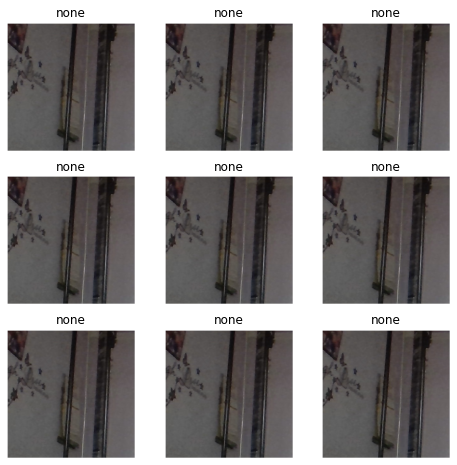

In [11]:
def _plot(i,j,ax):
    x,y = data.train_ds[5]
    x.show(ax, y=y)

    
plot_multi(_plot, 3, 3, figsize=(8,8))

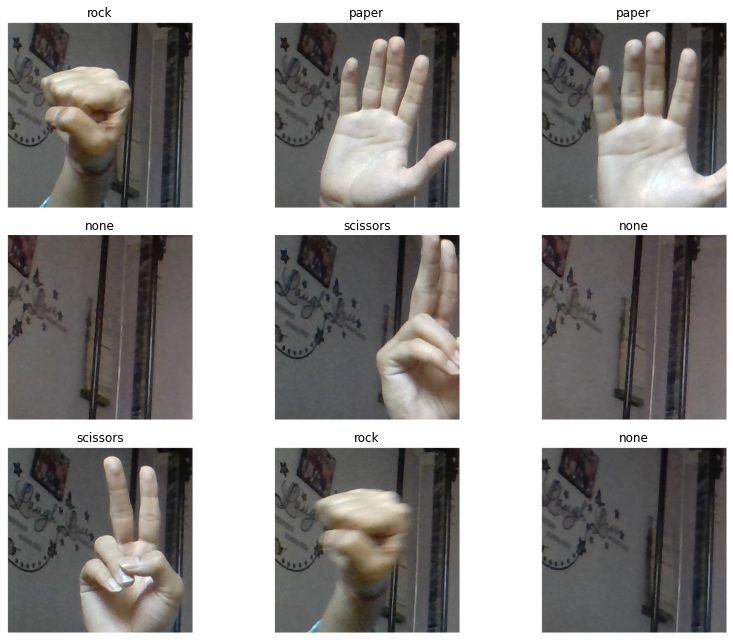

In [12]:

data.show_batch(rows=3, figsize=(12,9))

In [13]:
data.classes

['none', 'paper', 'rock', 'scissors']

In [0]:
# layers = [AdaptiveConcatPool2d(), Flatten(), nn.Linear(4,2)]
# head = nn.Sequential(*layers)
    
# learn = cnn_learner(data, models.squeezenet1_0, custom_head=head)

In [0]:
arch = models.squeezenet1_1

In [0]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [0]:
# # F1 = (MultiLabelFbeta(beta=2, average="weighted"))
# acc_02 = partial(accuracy_thresh, thresh=0.2)
# f_score = partial(fbeta, average='weighted')

In [0]:
learn = cnn_learner(data, arch, metrics=[accuracy],pretrained=False)

In [19]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


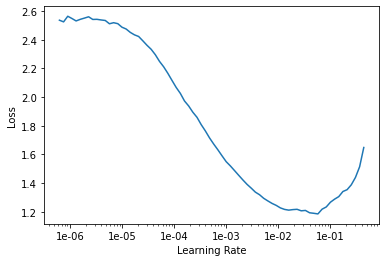

In [20]:
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [22]:
learn.fit_one_cycle(4, slice(5e-03))

epoch,train_loss,valid_loss,accuracy,time
0,0.574183,6.934636,0.435000,00:14
1,0.339327,7.989898,0.440000,00:14
2,0.231564,0.909662,0.775000,00:14
3,0.157093,0.077133,0.967500,00:14


In [0]:
learn.save('stage-1-rn50')

In [0]:
learn.export()

In [30]:
img=open_image('/content/RockPaperScissor/jtg.jpg')
learn.predict(img)

(Category paper,
 tensor(1),
 tensor([1.3703e-12, 9.9941e-01, 1.7771e-06, 5.9283e-04]))